In [1]:
from numpy import genfromtxt
import numpy as np
from numpy import *
import matplotlib
#matplotlib.use('TKAgg') # matplotlib renderer for windows
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle
from sklearn import svm
from sklearn.svm import SVC

In [2]:
#Loading and pruning the data
data = genfromtxt('heart.csv', delimiter=',')
data

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [3]:
#Printing the datasetd
X = data[:,0:12] #Feature set
Y = data[:,13]    #label Set

In [4]:
#Replacing 1-4 by label 1  tesko arthaat   # Item with 0 value is already indexed as 0 , so rest are indexed as 1
for index, item in enumerate(Y):   # Last row gives 4 diff types of output , so convert them to 0  or 1 
    if not (item == 0.0):       # that is either Yes or No
        Y[index] = 1
print(Y)
target_names = ['0','1']

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
# PLOTTING part starts

#Method to plot the graph for reduced Dimensions
def plot_2D(data,target,target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i,c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
    plt.legend()
    plt.savefig('Problem 2 Graph')

In [6]:
# TIME FOR SVM
# Classifying the data using a linear SVM and perdicting the probabilities of disease belonging to a particular classs

modelSVM = LinearSVC(C=0.1)
pca = PCA(n_components=2, whiten=True).fit(X)   # n denotes number of components to keep after Dimensionality Reduction
X_new = pca.transform(X)

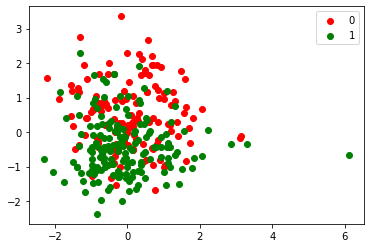

In [7]:
#Calling the above defined function plot_2D
plot_2D(X_new, Y, target_names)

In [8]:
# Applying cross validation on the training and test set for validating our linear SVM model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new, Y, test_size = 0.2, train_size=0.8, random_state=0)
modelSVM = modelSVM.fit(X_train,Y_train)
print("Linear SVC values with Split")
print(modelSVM.score(X_test, Y_test))

Linear SVC values with Split
0.7540983606557377


In [9]:
modelSVMRaw = LinearSVC(C = 0.1)
modelSVMRaw = modelSVMRaw.fit(X_new, Y)
cnt = 0
for i in modelSVMRaw.predict(X_new):
    if(i == Y[1]):
        cnt = cnt+1
print("Linear SVC score without split")
print(float(cnt)/101)

Linear SVC score without split
1.8217821782178218


In [10]:
# Applying the PCA on the data features
modelSVM2 = SVC(C = 0.1,kernel='rbf')

In [11]:
# Applying the cross validation on training and the test set for validating our linear SVM model
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_new, Y, test_size = 0.2, train_size=0.1, random_state=0)
modelSVM2 = modelSVM2.fit(X_train1,Y_train1)
print("RBF score with split")
print(modelSVM2.score(X_test1,Y_test1))

RBF score with split
0.4426229508196721


In [12]:
modelSVMRaw2 = SVC(C=0.1, kernel='rbf')
modelSVMRaw2 = modelSVMRaw2.fit(X_new,Y)
cnt1 = 0
for i in modelSVMRaw2.predict(X_new):
    if i == Y[1]:
        cnt1 = cnt1 + 1
print("RBF score without split")
print(float(cnt1)/298)

RBF score without split
0.6208053691275168


In [13]:
# Only perform 2 algorithms

# creating the mest plots
X_min, X_max = X_new[:,0].min() - 1, X_new[:,0].max() + 1
Y_min, Y_max = X_new[:,1].min() - 1, X_new[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max,0.2),
                    np.arange(Y_min, Y_max,0.2))

In [14]:
#Titles for the plot
titles = "SVC ( RBF kernel) - Plotting highest varied 2 PCA values"

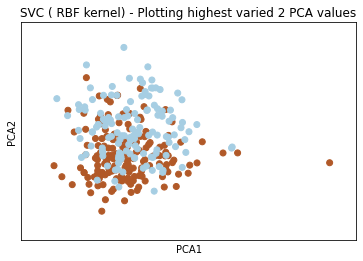

In [15]:
#plot also the color points
plt.scatter(X_new[:,0], X_new[:,1], c=Y, cmap = plt.cm.Paired)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
plt.show()

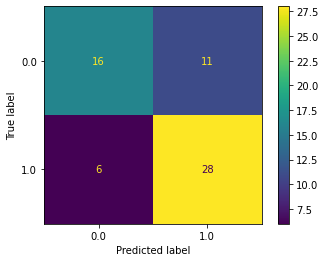

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
clf = svm.SVC(kernel='linear')
# Fit data
clf = clf.fit(X_train, Y_train)
plot_confusion_matrix(clf,X_test, Y_test)  
plt.show()